# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [237]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [238]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API")

In [239]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [240]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(q = "bitcoin", language="en", from_param = "2020-11-21", sort_by="relevancy")

In [241]:
bitcoin_news["articles"]

[{'source': {'id': None, 'name': 'Lifehacker.com'},
  'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
  'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
  'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
  'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
  'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
  'publishedAt': '2020-12-03T22:00:00Z',
  'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 ch

In [242]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = newsapi.get_everything(q = "ethereum", language="en", from_param = "2020-11-21", sort_by="relevancy")

In [243]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Text": text,
            #"date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,Compound,Negative,Neutral,Positive,Text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [244]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Text": text,
            #"date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...


In [245]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.253505,0.016700,0.905500,0.077750
std,0.350085,0.034697,0.084123,0.075022
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.835750,0.000000
50%,0.237750,0.000000,0.904500,0.074000
75%,0.489525,0.000000,1.000000,0.149000
max,0.801600,0.103000,1.000000,0.209000


In [246]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.048625,0.019400,0.94885,0.031750
std,0.190804,0.040318,0.07108,0.043627
min,-0.493900,0.000000,0.75300,0.000000
25%,0.000000,0.000000,0.90925,0.000000
50%,0.000000,0.000000,1.00000,0.000000
75%,0.110475,0.000000,1.00000,0.063000
max,0.421500,0.119000,1.00000,0.128000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [247]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [248]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
print(sw)
sw_addon = {"november", "december", "photo", "reuters", "also", "monday", "wedsneday"}

{'into', 'few', "hadn't", 'haven', 'with', 'he', 'wasn', 'am', 'or', 'through', 'weren', 'won', 'wouldn', "she's", 'couldn', "mustn't", 'its', 'all', 'hers', 'in', 'needn', 'will', 'isn', 'ourselves', 'only', 'over', 'once', 'why', 'below', 'his', 'hadn', 'off', 'more', 'no', 'same', 'are', 'up', 's', 'yourselves', 'we', 'been', 'such', 'herself', "it's", 'aren', "mightn't", 'because', 'further', 'just', 'ain', 'until', 'that', 'than', 'of', 'ma', 'any', 'so', 'o', 'myself', 'don', 'their', "haven't", 'at', 'yourself', "wasn't", "isn't", 'here', 'the', "shouldn't", 'does', "couldn't", 'each', 'some', 'had', "aren't", "didn't", 'having', "don't", 'yours', 'my', "hasn't", 'which', 're', 'too', 'but', 'while', 'itself', 'this', 'i', 'y', 'on', 'a', 'down', 'her', 'himself', 'above', 'under', 'an', 'ours', 'shan', 'do', 'him', 'who', 'other', 'can', "shan't", 'before', 'themselves', 'to', 'after', "weren't", 'hasn', 'mightn', 'very', "wouldn't", 'your', 'm', 'from', 'has', 'now', 'where', 

In [249]:
def tokenizer(text):
    lemmatizer = WordNetLemmatizer()
    my_list=[]
    for content in text["Text"]:
        sw = set(stopwords.words('english'))
        regex = re.compile("[^a-zA-Z ]")
        re_clean = regex.sub('', content)
        words = word_tokenize(re_clean)
        lem = [lemmatizer.lemmatize(word) for word in words]
        output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
        my_list.append(output)
    return my_list

In [250]:
bitcoin_words = tokenizer(bitcoin_df)
bitcoin_tokens = bitcoin_words
print(bitcoin_tokens)

[['visahas', 'partnered', 'cryptocurrency', 'startup', 'blockfi', 'offer', 'first', 'reward', 'credit', 'card', 'pay', 'bitcoin', 'rather', 'cash', 'worth', 'applying', 'unless', 'youre', 'extremely', 'bullish', 'char'], ['reaching', 'previous', 'alltime', 'high', 'th', 'st', 'bitcoin', 'trading', 'well', 'ha', 'surpassed', 'previous', 'peak', 'pricebitcoins', 'value', 'ha', 'rapidly', 'char'], ['almost', 'three', 'year', 'day', 'since', 'price', 'bitcoin', 'wa', 'close', 'breaking', 'ceiling', 'came', 'crashing', 'wednesday', 'arbitrary', 'milestone', 'hodlers', 'dream', 'wa', 'finally', 'char'], ['everything', 'dumb', 'worksas', 'come', 'close', 'cryptocurrency', 'world', 'experiencing', 'another', 'lateyear', 'surge', 'consumer', 'interest', 'price', 'climb', 'value', 'bitcoin', 'char'], ['unlike', 'conventional', 'cryptocurrencies', 'central', 'bank', 'control', 'digital', 'yuan', 'case', 'peoples', 'bank', 'china', 'move', 'give', 'country', 'power', 'theory', 'stability', 'freq',

In [251]:
ethereum_words = tokenizer(ethereum_df)
ethereum_tokens=ethereum_words
print(ethereum_tokens)

[['file', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', 'reutersdado', 'ruvicillustrationlondon', 'char'], ['file', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', 'reutersdado', 'ruvicillustrationlondon', 'char'], ['london', 'digital', 'currency', 'ethereum', 'xrp', 'soared', 'gaining', 'momentum', 'bitcoin', 'powered', 'towards', 'alltime', 'highfile', 'representation', 'ethereum', 'virtual', 'currency', 'char'], ['bitcoin', 'wa', 'derided', 'serious', 'investor', 'bubble', 'ponzi', 'scheme', 'year', 'ha', 'become', 'irresistible', 'investment', 'many', 'themjust', 'wednesday', 'bitcoin', 'topped', 'fo', 'char'], ['file', 'representation', 'virtual', 'currency', 'bitcoin', 'seen', 'front', 'stock', 'graph', 'illustration', 'taken', 'reutersdado', 'ruvicillustrationlondon', 'major', 'us', 'char'], ['file', 'represen

In [252]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_df["Tokens"] = bitcoin_words
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, th, st, bi..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, worksas, come, close, crypt..."
4,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [253]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_df["Tokens"] = ethereum_words
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, representation, ethereum, virtual, curr..."
1,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, representation, ethereum, virtual, curr..."
2,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, digital, currency, ethereum, xrp, soa..."
3,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,"[bitcoin, wa, derided, serious, investor, bubb..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[file, representation, virtual, currency, bitc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [254]:
from collections import Counter
from nltk import ngrams

In [255]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

flat=[]
for i in bitcoin_tokens:
    for j in i:
        flat.append(j)
bitcoin_gram_counts = Counter(ngrams(flat, n=2))
print(dict(bitcoin_gram_counts))        

{('visahas', 'partnered'): 1, ('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 1, ('startup', 'blockfi'): 1, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'reward'): 1, ('reward', 'credit'): 1, ('credit', 'card'): 1, ('card', 'pay'): 1, ('pay', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'char'): 1, ('char', 'reaching'): 1, ('reaching', 'previous'): 1, ('previous', 'alltime'): 1, ('alltime', 'high'): 3, ('high', 'th'): 1, ('th', 'st'): 1, ('st', 'bitcoin'): 1, ('bitcoin', 'trading'): 1, ('trading', 'well'): 1, ('well', 'ha'): 1, ('ha', 'surpassed'): 1, ('surpassed', 'previous'): 1, ('previous', 'peak'): 1, ('peak', 'pricebitcoins'): 1, ('pricebitcoins', 'value'): 1, ('value', 'ha'): 1, ('ha', 'rapidly'): 1, ('rapidly', 'char'): 1, ('char', 'almost'): 1, ('almost', 'three')

In [256]:
print(dict(bitcoin_gram_counts.most_common(10)))

{('virtual', 'currency'): 6, ('char', 'stafffile'): 4, ('illustration', 'taken'): 4, ('alltime', 'high'): 3, ('seen', 'illustration'): 3, ('currency', 'bitcoin'): 3, ('reutersdado', 'ruvicillustrationlondon'): 3, ('digital', 'currency'): 2, ('new', 'alltime'): 2, ('stafffile', 'representations'): 2}


In [257]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
flat_one=[]
for i in ethereum_tokens:
    for j in i:
        flat_one.append(j)
ethereum_gram_counts = Counter(ngrams(flat_one, n=2))
print(dict(ethereum_gram_counts)) 

{('file', 'representation'): 4, ('representation', 'ethereum'): 3, ('ethereum', 'virtual'): 3, ('virtual', 'currency'): 11, ('currency', 'standing'): 2, ('standing', 'pc'): 2, ('pc', 'motherboard'): 2, ('motherboard', 'seen'): 2, ('seen', 'illustration'): 4, ('illustration', 'picture'): 2, ('picture', 'february'): 2, ('february', 'reutersdado'): 2, ('reutersdado', 'ruvicillustrationlondon'): 7, ('ruvicillustrationlondon', 'char'): 3, ('char', 'file'): 5, ('char', 'london'): 1, ('london', 'digital'): 1, ('digital', 'currency'): 1, ('currency', 'ethereum'): 1, ('ethereum', 'xrp'): 1, ('xrp', 'soared'): 1, ('soared', 'gaining'): 1, ('gaining', 'momentum'): 1, ('momentum', 'bitcoin'): 1, ('bitcoin', 'powered'): 1, ('powered', 'towards'): 1, ('towards', 'alltime'): 1, ('alltime', 'highfile'): 1, ('highfile', 'representation'): 1, ('currency', 'char'): 1, ('char', 'bitcoin'): 1, ('bitcoin', 'wa'): 1, ('wa', 'derided'): 1, ('derided', 'serious'): 1, ('serious', 'investor'): 1, ('investor', 'b

In [258]:
print(dict(ethereum_gram_counts.most_common(10)))

{('virtual', 'currency'): 11, ('currency', 'bitcoin'): 8, ('illustration', 'taken'): 8, ('reutersdado', 'ruvicillustrationlondon'): 7, ('bitcoin', 'seen'): 7, ('char', 'file'): 5, ('representation', 'virtual'): 5, ('taken', 'reutersdado'): 5, ('file', 'representation'): 4, ('seen', 'illustration'): 4}


In [259]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [260]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(flat)

[('char', 20),
 ('bitcoin', 15),
 ('currency', 8),
 ('ha', 7),
 ('virtual', 6),
 ('illustration', 6),
 ('cryptocurrency', 5),
 ('alltime', 5),
 ('year', 5),
 ('reutersdado', 5)]

In [261]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(flat_one)

[('char', 20),
 ('bitcoin', 15),
 ('currency', 12),
 ('virtual', 11),
 ('taken', 11),
 ('illustration', 10),
 ('reutersdado', 10),
 ('seen', 9),
 ('representation', 8),
 ('ruvicillustrationlondon', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [262]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [263]:
def listToString(coin_tokens):  
    str = " "    
    return (str.join(coin_tokens))

Text(0.5, 1.0, 'Bitcoin Word Cloud')

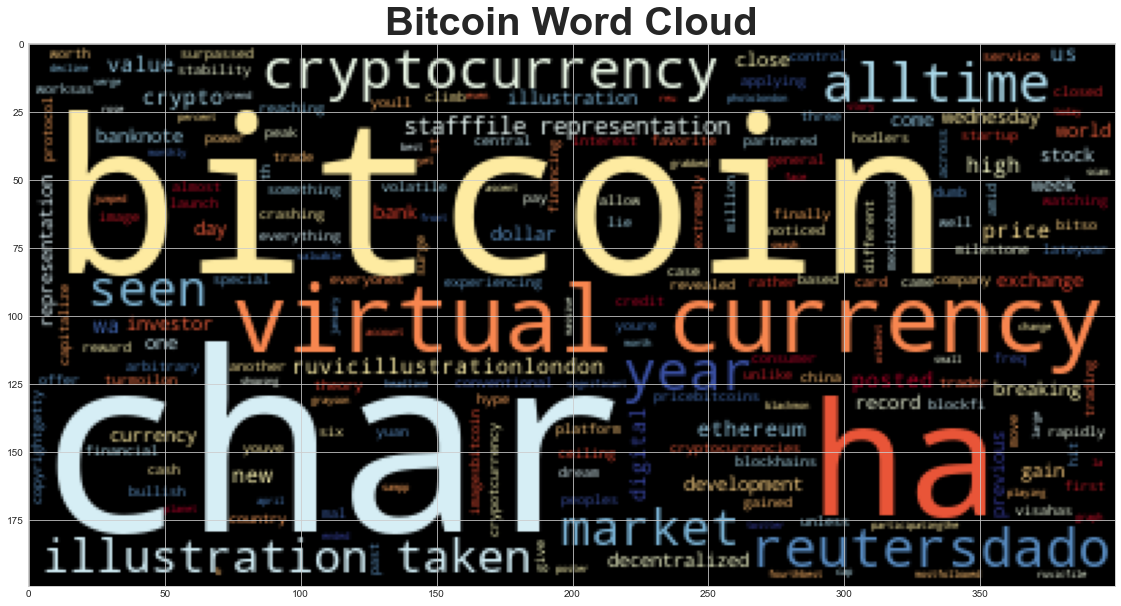

In [264]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bitcoin_string = listToString(flat)
wc = WordCloud(colormap="RdYlBu").generate(bitcoin_string)
plt.imshow(wc)
fontdict = {"fontsize": 40, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud",  fontdict=fontdict)

Text(0.5, 1.0, 'Ethereum Word Cloud')

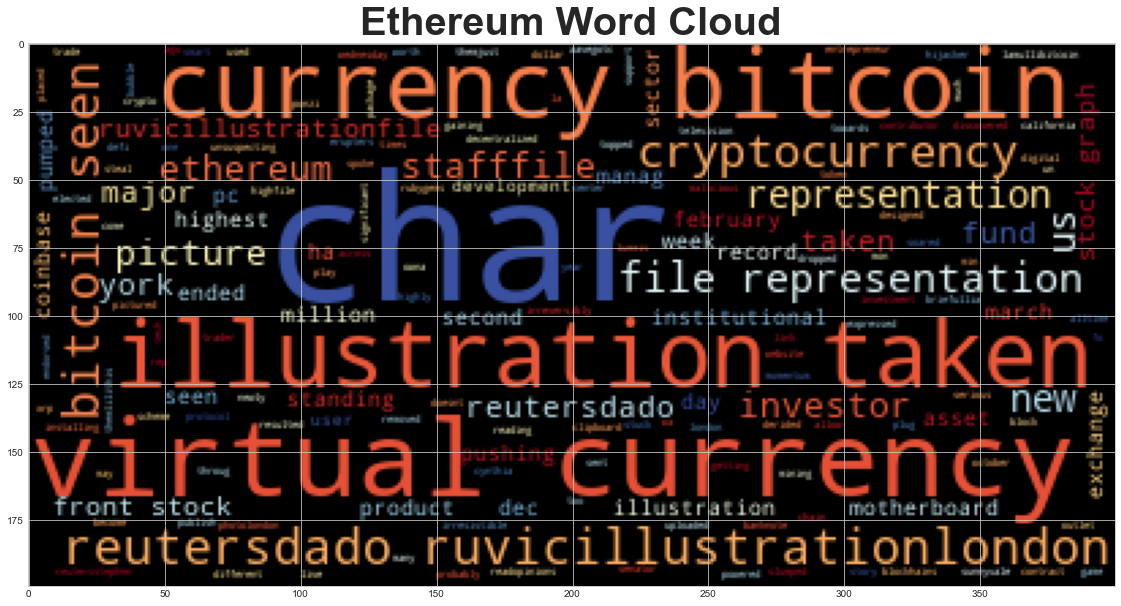

In [265]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ethereum_string = listToString(flat_one)
wc = WordCloud(colormap="RdYlBu").generate(ethereum_string)
plt.imshow(wc)
fontdict = {"fontsize": 40, "fontweight": "bold"}
plt.title("Ethereum Word Cloud",  fontdict=fontdict)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [266]:
import spacy
from spacy import displacy

In [267]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [268]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [269]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
bitcoin_doc=listToString(bitcoin_df["Text"])
bitcoin_ner_tokens = nlp(bitcoin_doc)

print(bitcoin_ner_tokens)
    


Visa has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.
Bitcoins value has rapidly… [+1062 chars] Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars] Everything is dumb until it works.
As 2020 comes to a close, the cryptocurrency world is experiencing another late-year surge of consumer interest as prices climb in value. Bitcoin is over $23,000 a… [+1705 chars] Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the co

In [270]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
entities = [ent.text for ent in bitcoin_ner_tokens.ents if ent.label_ in ['GPE', 'ORG']]

# Add a title to the document
# YOUR CODE HERE!

In [271]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_ner_tokens, style='ent')

In [272]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in bitcoin_ner_tokens.ents if ent.label_ == "GPE" or'ORG'])

['Visa', 'first', 'Bitcoin', 'November 30th, 2020', 'December 1st', '2020', 'bitcoin', 'above $20,000', 'almost three years', 'the day', 'Bitcoin', '20,000', 'Wednesday', '2020', 'late-year', 'Bitcoin', 'over $23,000', 'digital yuan', 'the People’s Bank of China', 'the past few weeks', 'bitcoin', 'digital', 'hype', 'Bitcoin', '20,000', '14,800', 'more than 170%', 'this year', 'Six years', 'Mexico', '$62 million', 'Decentralized', '4', 'U.S.', 'November', 'today', '500', '10.8 percent', 'November', 'monthly', 'April', 'fourth', 'Grayson Blackmon /', 'the year', 'the day', 'Twitter', '6', '6', 'one', 'above $20,000', 'Wednesday', 'a year', 'Reuters', 'Bitcoin', 'U.S.', 'January 6, 2020', 'REUTERS/', 'Dado Ruvic/File Photo', 'LONDON', 'Reuters', 'Bitcoin', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reu', 'Bitcoin', 'this week', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'John Vento', 'Reuters', 'Fred Katayama', 'Bitcoin

---

## Ethereum NER

In [273]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

ethereum_doc=listToString(ethereum_df["Text"])
ethereum_ner_tokens = nlp(ethereum_doc)

print(ethereum_ner_tokens)

FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration
LONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration
LONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.
FILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] Bitcoin was once derided by serious investors as a bubble or a Ponzi scheme. But this year, it has become an irresistible investment for many of them. 
Just this Wednesday, bitcoin topped $20,000 fo… [+5208 chars] FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS

In [274]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
entities = [ent.text for ent in ethereum_ner_tokens.ents if ent.label_ in ['GPE', 'ORG']]

# Add a title to the document
# YOUR CODE HERE!

In [275]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_ner_tokens, style='ent')

In [276]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in ethereum_ner_tokens.ents if ent.label_ == "GPE" or'ORG'])

['February 3, 2018', 'REUTERS/', 'Reuters', 'February 3, 2018', 'REUTERS/', 'Reuters', 'LONDON', 'Reuters', 'XRP', 'Monday', 'Bitcoin', 'this year', 'Wednesday', 'bitcoin', '20,000', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'NEW YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'NEW YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'The New York Times', 'Coinbase', 'December', '15', '2020', '6 min', 'A few days ago', 'US', 'Cynthia Lummis', 'Bitcoin', 'Reuters', 'Bitcoin', 'U.S.', 'May 26, 2020', 'REUTERS/', 'Reuters', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'LONDON', 'Reuters', 'Bitcoin', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Bitcoin', 'as much as 6%', 'One day', 'Rub